In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv('Customer-Churn.csv')
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
print(df.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
df.drop(columns=['customerID'],inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
print(df['TotalCharges'].isnull().sum())

11


In [7]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\milan\AppData\Local\Temp\ipykernel_26152\2840544469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [8]:
print(df['TotalCharges'].isnull().sum())

0


In [9]:
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})

In [10]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('Churn',errors='ignore')


In [11]:
df = pd.get_dummies(df,columns=categorical_columns,drop_first=True)

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

In [14]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [15]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.4, random_state=42,stratify=y)
X_val, X_test,y_val,y_test = train_test_split(X_temp, y_temp,test_size=0.5,random_state=42,stratify=y_temp)

print(f"Trening skup: {X_train.shape}, Validacioni skup: {X_val.shape}, Testni skup: {X_test.shape}")

Trening skup: (4225, 30), Validacioni skup: (1409, 30), Testni skup: (1409, 30)


In [ ]:
numerical_columns = ['tenure','MontlyCharges','TotalCharges']

scaler = StandardScaler()

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [18]:
model = LogisticRegression(max_iter=500)
model.fit(X_train,y_train)

c:\Users\milan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [19]:
y_val_pred = model.predict(X_val)

In [20]:
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

print(classification_report(y_val,y_val_pred))

Validation Accuracy: 0.8275
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1035
           1       0.71      0.60      0.65       374

    accuracy                           0.83      1409
   macro avg       0.78      0.75      0.77      1409
weighted avg       0.82      0.83      0.82      1409



In [21]:
y_test_pred = model.predict(X_test)

In [22]:
accuracy_test = accuracy_score(y_test,y_test_pred)
print(f'Test Accuracy: {accuracy_test:.4f}')
print(classification_report(y_test,y_test_pred))

Test Accuracy: 0.7885
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.62      0.53      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [44]:
y_pred = model.predict(X_test)  # Predikcije modela

# Dodavanje realnih i prediktovanih vrednosti u DataFrame
df_results = pd.DataFrame({
    "Real_Churn": y_test,  
    "Predicted_Churn": y_pred  
})
print(df_results.iloc[:15])

      Real_Churn  Predicted_Churn
2881           0                0
3994           1                0
2663           0                0
3195           0                1
5093           0                0
6546           0                0
4029           0                0
2997           1                0
3621           1                1
1366           1                1
2148           0                0
5797           0                0
4735           0                0
3119           1                1
6938           0                0


In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
cm = confusion_matrix(y_test,y_pred)

TN, FP, FN, TP = cm.ravel()

print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

True Positives (TP): 197
True Negatives (TN): 914
False Positives (FP): 121
False Negatives (FN): 177


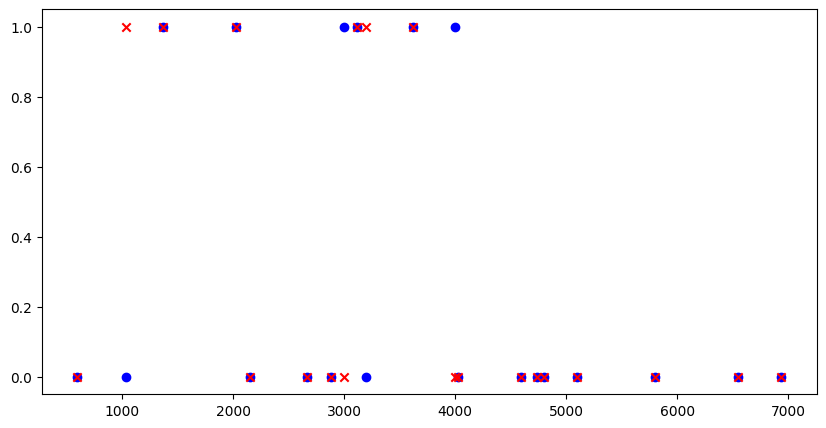

In [45]:
plt.figure(figsize = (10,5))
plt.scatter(df_results.index[:20],df_results["Real_Churn"][:20],color="blue",label="Real Churn")
plt.scatter(df_results.index[:20],df_results["Predicted_Churn"][:20],color="red",label="predicted Churn",marker='x')
